# Granger Causality Analysis

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

cleaned_data = pd.read_csv("Study2_data.csv")

# Convert StartDate to datetime and extract Year-Month
cleaned_data['StartDate'] = pd.to_datetime(cleaned_data['StartDate'])
cleaned_data['YearMonth'] = cleaned_data['StartDate'].dt.to_period('M')

# Combine LSAS_avo and LSAS_anx into LSAS_1, LSAS_2, ..., LSAS_24
for i in range(1, 25):
    avo_col = f'LSAS_avo{i}'
    anx_col = f'LSAS_anx{i}'
    combined_col = f'LSAS_{i}'
    cleaned_data[combined_col] = cleaned_data[avo_col] + cleaned_data[anx_col]

# Drop LSAS_avo_* and LSAS_anx_* columns
cols_to_drop = [f'LSAS_avo{i}' for i in range(1, 25)] + [f'LSAS_anx{i}' for i in range(1, 25)]
print("Columns before dropping:", cleaned_data.columns.tolist())
cleaned_data = cleaned_data.drop(columns=cols_to_drop, errors='raise')  # Use 'raise' to ensure it fails if columns aren't found
print("Columns after dropping:", cleaned_data.columns.tolist())

# Ensure only combined LSAS columns are used
lsas_columns = [f'LSAS_{i}' for i in range(1, 25)]
print("LSAS columns:", lsas_columns)

# Define other question columns
bdi_columns = [col for col in cleaned_data.columns if 'BDI' in col]
cfs_columns = [col for col in cleaned_data.columns if 'CFS' in col]

# Reverse score CFS questions 2, 3, 5, 10 in place
reverse_columns = ['CFS_2_R', 'CFS_3_R', 'CFS_5_R', 'CFS_10_R']

# Apply the reverse scoring transformation in place
cleaned_data[reverse_columns] = 7 - cleaned_data[reverse_columns]

# Reverse the DIRECTION of all CFS columns
cleaned_data[cfs_columns] *= -1

# Combine all question columns into one list
question_columns = lsas_columns + bdi_columns + cfs_columns
print("Question columns for melt:", question_columns)

# Reshape the data so that each row is a unique observation
# Each row should have a Participant_Number, StartDate, EndDate, Question, and Score
long_data = pd.melt(cleaned_data, 
                    id_vars=['Participant_Number', 'YearMonth'], 
                    value_vars=question_columns, 
                    var_name='Question', value_name='Score')

# Aggregate observations within the same time point by the mean
# Create a dictionary of unique participants for each time point
participant_dict = long_data.groupby('YearMonth')['Participant_Number'].apply(set).to_dict()
long_data= (
    long_data.groupby(['Participant_Number', 'YearMonth', 'Question'])['Score']
    .mean()
    .reset_index()
)

# Standardize
long_data['Score'] = (long_data['Score'] - long_data['Score'].mean()) / long_data['Score'].std()

df = long_data.copy()

cleaned_data



Columns before dropping: ['Qualtricsname', 'Participant_Number', 'Corona', 'ResponseID', 'Worker_ID', 'StartDate', 'EndDate', 'Durationinseconds', 'Age', 'Gender', 'Education_version', 'Education_years_A', 'Relationship_status', 'Sexual_attraction', 'Children_YN', 'Children_num', 'Nationality', 'Ethnicity', 'LSAS_anx1', 'LSAS_anx2', 'LSAS_anx3', 'LSAS_anx4', 'LSAS_anx5', 'LSAS_anx6', 'LSAS_anx7', 'LSAS_anx8', 'LSAS_anx9', 'LSAS_anx10', 'LSAS_anx11', 'LSAS_anx12', 'LSAS_anx13', 'LSAS_anx14', 'LSAS_anx15', 'LSAS_anx16', 'LSAS_anx17', 'LSAS_anx18', 'LSAS_anx19', 'LSAS_anx20', 'LSAS_anx21', 'LSAS_anx22', 'LSAS_anx23', 'LSAS_anx24', 'LSAS_avo1', 'LSAS_avo2', 'LSAS_avo3', 'LSAS_avo4', 'LSAS_avo5', 'LSAS_avo6', 'LSAS_avo7', 'LSAS_avo8', 'LSAS_avo9', 'LSAS_avo10', 'LSAS_avo11', 'LSAS_avo12', 'LSAS_avo13', 'LSAS_avo14', 'LSAS_avo15', 'LSAS_avo16', 'LSAS_avo17', 'LSAS_avo18', 'LSAS_avo19', 'LSAS_avo20', 'LSAS_avo21', 'LSAS_avo22', 'LSAS_avo23', 'LSAS_avo24', 'BDI_1', 'BDI_2', 'BDI_3', 'BDI_4', '

,Qualtricsname,Participant_Number,Corona,ResponseID,Worker_ID,StartDate,EndDate,Durationinseconds,Age,Gender,...,LSAS_15,LSAS_16,LSAS_17,LSAS_18,LSAS_19,LSAS_20,LSAS_21,LSAS_22,LSAS_23,LSAS_24
0,Corona Time 4 Mturk,163.0,1.0,R_3egJy6wHBBW38PG,A370UEGCN3MI1B,2020-05-13,2020-05-12 16:26:37.824,2521.0,NaN,NaN,...,5.0,5.0,2.0,4.0,0.0,2.0,6.0,2.0,4.0,6.0
1,Corona Time 5 Mturk,362.0,1.0,R_2Y3WcUp9TYYltSl,A370UEGCN3MI1B,2020-06-19,2020-06-18 15:30:41.184,1451.0,NaN,NaN,...,2.0,4.0,2.0,6.0,0.0,2.0,6.0,0.0,0.0,4.0
2,Dynamic- third running,57.0,0.0,R_325skBUMRHvITMd,A06711361DP1JL158BWS8,2018-11-01,2018-10-31 13:25:32.160,1066.0,30.0,1.0,...,1.0,3.0,0.0,0.0,0.0,2.0,5.0,1.0,1.0,4.0
3,Social Mirror training A and competition 30-50-10,36.0,0.0,R_2AM8uRll2824CVj,A06711361DP1JL158BWS8,2020-11-03,2020-11-02 23:33:36.288,1221.0,32.0,1.0,...,1.0,3.0,0.0,2.0,0.0,2.0,6.0,4.0,0.0,3.0
4,Randomization- faces,30.0,0.0,R_1hY0d7uP57xoyvT,A101TTS7WAVXAV,2020-01-14,2020-01-13 13:34:30.432,3655.0,40.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,Randomization- faces,611.0,0.0,R_1Lva6Nsx4fNUZrj,AZV8213BMVMOT,2020-01-28,2020-01-27 16:19:56.064,1840.0,29.0,1.0,...,3.0,4.0,2.0,4.0,2.0,6.0,2.0,2.0,2.0,4.0
4677,Dynamic- fourth running,122.0,0.0,R_1K8PpS9VOWedo9T,AZYUCL6B0YROY,2018-12-14,2018-12-13 21:17:42.720,1506.0,29.0,1.0,...,2.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0
4678,Mturk 2 year longitudinal,88.0,0.0,R_2EoyssiIniHffoZ,AZYUCL6B0YROY,2020-09-01,2020-08-31 18:07:33.600,448.0,NaN,NaN,...,2.0,2.0,4.0,3.0,0.0,3.0,3.0,4.0,4.0,2.0
4679,Rank vs affiliation context first running,262.0,0.0,R_3lVPJ9o6djqlHOv,AZZA3J049G7R5,2020-09-23,2020-09-22 23:56:38.688,1674.0,29.0,2.0,...,6.0,3.0,4.0,4.0,4.0,6.0,5.0,6.0,4.0,4.0


#### Visualizing Participant Overlap

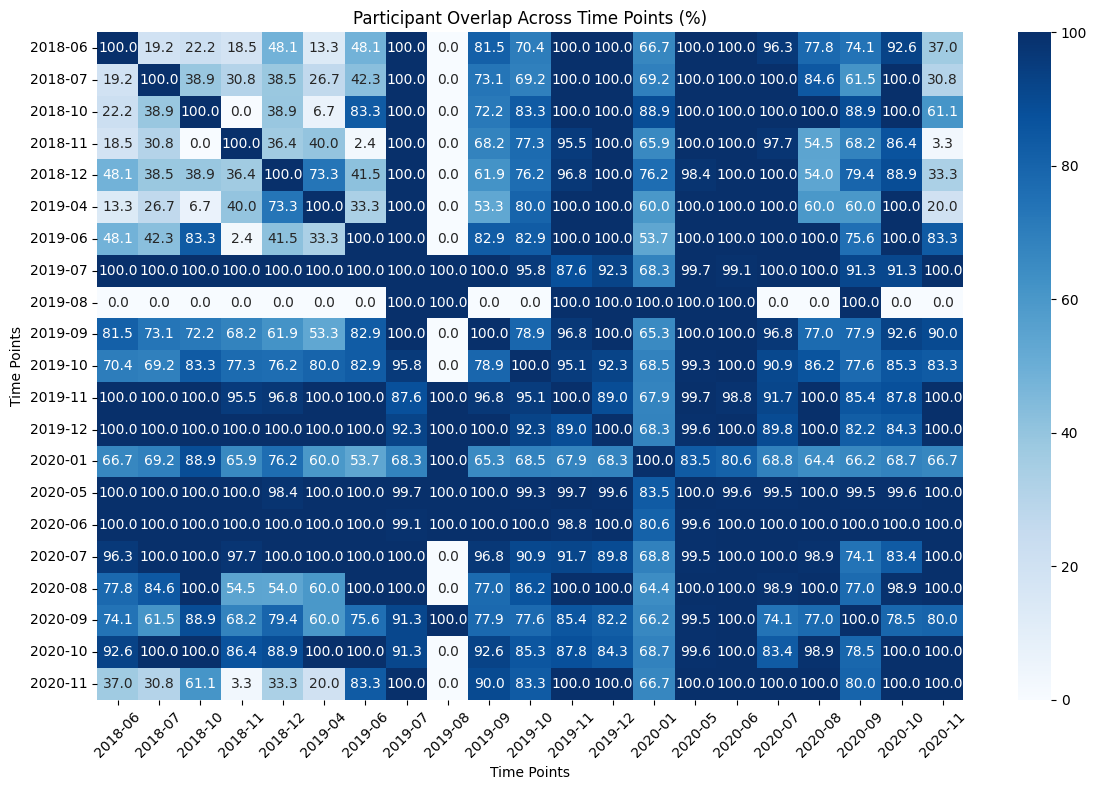

In [2]:
# Create a dictionary of unique participants for each time point
participant_dict = df.groupby('YearMonth')['Participant_Number'].apply(set).to_dict()

# Initialize an empty DataFrame to store pairwise overlap percentages
time_points = list(participant_dict.keys())
overlap_matrix = pd.DataFrame(index=time_points, columns=time_points)

# Compute pairwise overlaps
for t1 in time_points:
    for t2 in time_points:
        overlap_count = len(participant_dict[t1].intersection(participant_dict[t2]))
        min_count = min(len(participant_dict[t1]), len(participant_dict[t2]))
        overlap_percentage = (overlap_count / min_count) * 100 if min_count > 0 else 0
        overlap_matrix.loc[t1, t2] = overlap_percentage

# Convert overlap matrix to numeric for plotting
overlap_matrix = overlap_matrix.astype(float)

# Visualize the overlap matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(overlap_matrix, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title("Participant Overlap Across Time Points (%)")
plt.xlabel("Time Points")
plt.ylabel("Time Points")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Subsetting for 55% Consistency

In [3]:
# Set threshold for at least 55% of total time points
threshold_granger = 0.55 * len(time_points)  # A little more than half of total time points

# Count valid time points for each participant
valid_time_points = df.groupby('Participant_Number')['YearMonth'].nunique()

# Filter participants who meet the threshold
consistent_participants_granger = valid_time_points[valid_time_points >= threshold_granger].index

# Subset the dataset
df_granger = df[df['Participant_Number'].isin(consistent_participants_granger)]

# Save the filtered dataset to a new CSV file
df_granger.to_csv("granger_data.csv", index=False)

# Granger Causality

## Means

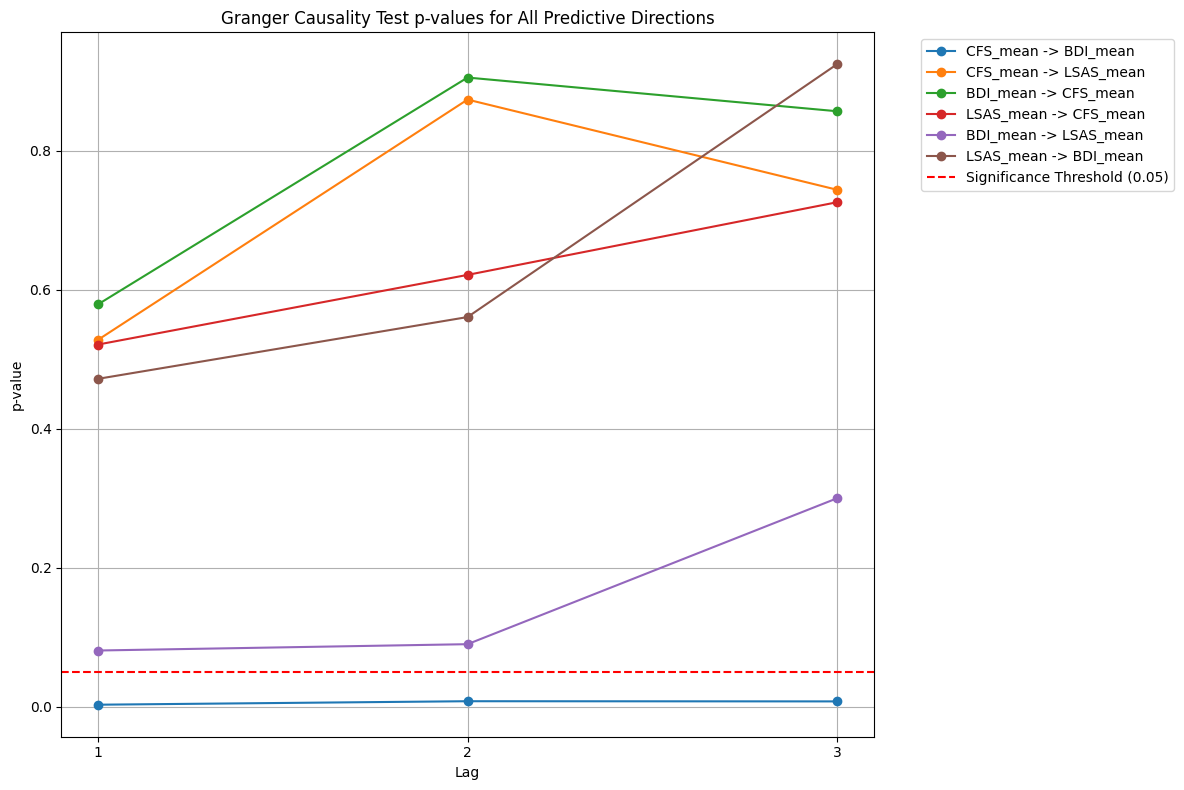

Regression Coefficients for CFS → BDI:
             x1        x2     const        x3        x4        x5        x6
Lag 1  0.028041  0.984233 -1.709186       NaN       NaN       NaN       NaN
Lag 2 -0.178572 -0.069361 -2.185032  0.998551  0.180004       NaN       NaN
Lag 3 -0.140164 -0.248285 -2.704788 -0.116391  1.122826 -0.080869  0.900152


In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
import pandas as pd

# Pivot data to wide format
df_granger_pivot = df_granger.pivot_table(index='YearMonth', columns='Question', values='Score', aggfunc='mean')

# Select columns by scale
cfs_columns = [col for col in df_granger_pivot.columns if 'CFS' in col]
bdi_columns = [col for col in df_granger_pivot.columns if 'BDI' in col]
lsas_columns = [col for col in df_granger_pivot.columns if 'LSAS' in col]

# Calculate mean scores across items for each time point
df_mean_scores = pd.DataFrame({
    'CFS_mean': df_granger_pivot[cfs_columns].mean(axis=1),
    'BDI_mean': df_granger_pivot[bdi_columns].mean(axis=1),
    'LSAS_mean': df_granger_pivot[lsas_columns].mean(axis=1)
})

# Run Granger causality tests
granger_tests = {
    'CFS_mean -> BDI_mean': ['CFS_mean', 'BDI_mean'],
    'CFS_mean -> LSAS_mean': ['CFS_mean', 'LSAS_mean'],
    'BDI_mean -> CFS_mean': ['BDI_mean', 'CFS_mean'],
    'LSAS_mean -> CFS_mean': ['LSAS_mean', 'CFS_mean'],
    'BDI_mean -> LSAS_mean': ['BDI_mean', 'LSAS_mean'],
    'LSAS_mean -> BDI_mean': ['LSAS_mean', 'BDI_mean']
}

p_values = {}
coefficients_clean = {}

for label, variables in granger_tests.items():
    result = grangercausalitytests(df_mean_scores[variables], maxlag=3, verbose=False)
    p_values[label] = [result[lag][0]['ssr_ftest'][1] for lag in result]

    # If this is the main one you care about, extract coefficients
    if label == 'CFS_mean -> BDI_mean':
        coefficients_clean[label] = {}
        for lag in result:
            model_result = result[lag][1][1]  # RegressionResultsWrapper
            param_values = model_result.params
            param_names = model_result.model.exog_names
            coeff_dict = dict(zip(param_names, param_values))
            coefficients_clean[label][f"Lag {lag}"] = coeff_dict

# Plot p-values across lags
lags = range(1, 4)
plt.figure(figsize=(12, 8))
for label, values in p_values.items():
    plt.plot(lags, values, marker='o', label=label)
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xticks(lags)
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.title('Granger Causality Test p-values for All Predictive Directions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: view the regression coefficients for CFS -> BDI
coeff_cfs_bdi = pd.DataFrame.from_dict(coefficients_clean['CFS_mean -> BDI_mean'], orient='index')
print("Regression Coefficients for CFS → BDI:")
print(coeff_cfs_bdi)


## Per-Question

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


# Run Granger causality tests at the item level
results = []

# Loop through all item pairs between CFS and BDI
for cfs_item in cfs_columns:
    for bdi_item in bdi_columns:
        try:
            test_result = grangercausalitytests(df_granger[[cfs_item, bdi_item]].dropna(), maxlag=3, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in test_result]
            results.append({'Cause': cfs_item, 'Effect': bdi_item, 'Lag 1 p-value': p_values[0], 'Lag 2 p-value': p_values[1], 'Lag 3 p-value': p_values[2]})
        except Exception as e:
            print(f"Error processing {cfs_item} -> {bdi_item}: {e}")

# Loop through all item pairs between CFS and LSAS
for cfs_item in cfs_columns:
    for lsas_item in lsas_columns:
        try:
            test_result = grangercausalitytests(df_granger[[cfs_item, lsas_item]].dropna(), maxlag=3, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in test_result]
            results.append({'Cause': cfs_item, 'Effect': lsas_item, 'Lag 1 p-value': p_values[0], 'Lag 2 p-value': p_values[1], 'Lag 3 p-value': p_values[2]})
        except Exception as e:
            print(f"Error processing {cfs_item} -> {lsas_item}: {e}")

# Loop through all item pairs between BDI and LSAS
for bdi_item in bdi_columns:
    for lsas_item in lsas_columns:
        try:
            test_result = grangercausalitytests(df_granger[[bdi_item, lsas_item]].dropna(), maxlag=3, verbose=False)
            p_values = [test_result[lag][0]['ssr_ftest'][1] for lag in test_result]
            results.append({'Cause': bdi_item, 'Effect': lsas_item, 'Lag 1 p-value': p_values[0], 'Lag 2 p-value': p_values[1], 'Lag 3 p-value': p_values[2]})
        except Exception as e:
            print(f"Error processing {bdi_item} -> {lsas_item}: {e}")

# Make a comprehensive table with p-values at all lags
df_results = pd.DataFrame(results)

# Filter for significant relationships (any lag p-value < 0.05)
df_significant = df_results[(df_results['Lag 1 p-value'] < 0.05) | 
                            (df_results['Lag 2 p-value'] < 0.05) | 
                            (df_results['Lag 3 p-value'] < 0.05)]

# Sort by Lag 1 p-value for significance
df_significant = df_significant.sort_values(by=['Lag 1 p-value'])
df_significant.to_csv("granger_significant_results.csv", index=False)

df_significant

Error processing CFS_1 -> BDI_1: "None of [Index(['CFS_1', 'BDI_1'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_10: "None of [Index(['CFS_1', 'BDI_10'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_11: "None of [Index(['CFS_1', 'BDI_11'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_12: "None of [Index(['CFS_1', 'BDI_12'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_13: "None of [Index(['CFS_1', 'BDI_13'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_14: "None of [Index(['CFS_1', 'BDI_14'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_15: "None of [Index(['CFS_1', 'BDI_15'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_16: "None of [Index(['CFS_1', 'BDI_16'], dtype='object')] are in the [columns]"
Error processing CFS_1 -> BDI_17: "None of [Index(['CFS_1', 'BDI_17'], dtype='object')] are in the [columns]"
Error proces

KeyError: 'Lag 1 p-value'

In [ ]:
# Rank nodes by how many significant relationships they have (as the cause)
significant_causes = df_significant['Cause'].value_counts()
significant_causes

Cause
CFS_6       25
CFS_7       21
CFS_1       20
CFS_11      20
CFS_4       19
CFS_9       17
CFS_12      13
CFS_8       12
CFS_5_R     11
BDI_14       9
CFS_2_R      8
BDI_17       8
BDI_10       8
CFS_3_R      5
BDI_5        5
BDI_9        5
BDI_3        5
BDI_19       4
BDI_20       4
BDI_1        3
BDI_12       3
BDI_18       3
CFS_10_R     3
BDI_8        3
BDI_4        1
BDI_15       1
BDI_7        1
Name: count, dtype: int64

In [ ]:
# Rank nodes by how many significant relationships they have (as the effect)
significant_effects = df_significant['Effect'].value_counts()
significant_effects

Effect
LSAS_11    15
LSAS_16    13
LSAS_1     12
LSAS_13    11
LSAS_18     9
LSAS_9      9
BDI_8       8
LSAS_17     8
BDI_14      7
BDI_5       7
BDI_6       7
BDI_1       7
BDI_17      7
BDI_20      7
BDI_12      7
LSAS_10     7
BDI_11      6
BDI_13      6
LSAS_2      6
BDI_4       6
LSAS_20     6
LSAS_6      6
BDI_18      5
LSAS_19     5
BDI_3       5
LSAS_23     5
LSAS_8      5
LSAS_21     4
BDI_7       4
LSAS_22     4
BDI_19      4
LSAS_15     4
BDI_16      3
LSAS_7      2
LSAS_5      2
LSAS_4      2
BDI_2       2
LSAS_24     2
BDI_9       2
Name: count, dtype: int64

### Sankey Diagram

In [ ]:
import plotly.graph_objects as go

# Prepare data for Sankey diagram
sources = []
targets = []
values = []

# Add data for significant relationships
for _, row in df_significant.iterrows():
    sources.append(row['Cause'])
    targets.append(row['Effect'])
    values.append(min(row['Lag 1 p-value'], row['Lag 2 p-value'], row['Lag 3 p-value']))

# Create a list of unique labels
labels = list(set(sources + targets))

# Map labels to indices
label_indices = {label: i for i, label in enumerate(labels)}

# Convert sources and targets to indices
sources = [label_indices[source] for source in sources]
targets = [label_indices[target] for target in targets]

# Color code each node
# BDI is light blue, CFS is orange, LSAS is light green
node_colors = []
for label in labels:
    if 'BDI' in label:
        node_colors.append('lightblue')
    elif 'CFS' in label:
        node_colors.append('orange')
    elif 'LSAS' in label:
        node_colors.append('lightgreen')
    else:
        node_colors.append('white')

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# Make bigger
fig.update_layout(height=800, width=1200)

fig.update_layout(title_text="Granger Causality Sankey Diagram", font_size=10)
fig.show()
